In [10]:
# project_name = "SeamTaping"
project_name = "WRB"

Add paths to the project directory and the directory containing utils

In [11]:
import sys
import os

# Add the path to the project directory
utils_path = os.path.abspath('..')
if utils_path not in sys.path:
    sys.path.append(utils_path)
# Add the path to the directory containing utils to sys.path
utils_path = os.path.abspath('../utils')
if utils_path not in sys.path:
    sys.path.append(utils_path)
print(sys.path)

['c:\\Users\\User\\.conda\\envs\\Azure-Custom-Vision-Practice\\python312.zip', 'c:\\Users\\User\\.conda\\envs\\Azure-Custom-Vision-Practice\\DLLs', 'c:\\Users\\User\\.conda\\envs\\Azure-Custom-Vision-Practice\\Lib', 'c:\\Users\\User\\.conda\\envs\\Azure-Custom-Vision-Practice', '', 'c:\\Users\\User\\.conda\\envs\\Azure-Custom-Vision-Practice\\Lib\\site-packages', 'c:\\Users\\User\\.conda\\envs\\Azure-Custom-Vision-Practice\\Lib\\site-packages\\win32', 'c:\\Users\\User\\.conda\\envs\\Azure-Custom-Vision-Practice\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\User\\.conda\\envs\\Azure-Custom-Vision-Practice\\Lib\\site-packages\\Pythonwin', 'd:\\Work\\Crack-Detection', 'd:\\Work\\Crack-Detection\\utils']


## Create JSON dataset with bounding box annotations

In [15]:
import json
from utils.transform_functions import points_to_bbox

xlsx_dataset_name = f"{project_name}_All"
json_dataset_name_polygon = xlsx_dataset_name + '_polygon_annotations'
json_dataset_path_polygon = '../dataset/' + json_dataset_name_polygon + '.json'
# Read the input JSON file
with open(json_dataset_path_polygon, 'r') as f:
    input_data = json.load(f)

def transform_data(data):
    transformed = []
    for item in data:
        image_urls = item["image_urls"]  # Using the first URL in the list
        annotations = []
        for annotation in item["annotations"]:
            bbox = points_to_bbox(annotation["points"])
            # Check if bbox elements are not positive
            if not are_bbox_elements_positive(bbox):
                print(f"Invalid bbox for image file: {item['image_file_name']}, Label: {annotation['label']}, Bbox: {bbox}")
                continue

            annotations.append({
                "label": annotation["label"],
                "bbox": bbox
            })
        
        if len(annotations) > 0:
            transformed.append({
                "image_file_name": item['image_file_name'],
                "image_urls": image_urls,
                "annotations": annotations
            })
    return transformed

def are_bbox_elements_positive(bbox):
    """
    Checks if all elements of the bounding box (bbox) are positive.
    Returns True if all are positive, False otherwise.
    """
    for elem in bbox:
        if elem <= 0:
            return False
    return True

# Transform the data
output_data = transform_data(input_data)
num_images = len(output_data)
num_annotations = sum(len(item["annotations"]) for item in output_data)
print(f"Number of images: {num_images}")
print(f"Number of annotations: {num_annotations}")

# Save the transformed data to a new JSON file
json_dataset_name_bbox = xlsx_dataset_name + '_bbox_annotations'
json_dataset_path_bbox = '../dataset/' + json_dataset_name_bbox + '.json'
with open(json_dataset_path_bbox, 'w') as f:
    json.dump(output_data, f, indent=2)

print(f"Transformed dataset saved to '{json_dataset_path_bbox}'")


Invalid bbox for image file: 1073777.jpg, Label: WRB-Bad, Bbox: [571.4731585518102, 200.7061485642946, 0.0, 0.0]
Invalid bbox for image file: 674932.jpg, Label: WRB-Bad, Bbox: [-0.5985631929599722, 529.5581706058283, 39.257673090649526, 39.25767309064952]
Invalid bbox for image file: 969596.jpg, Label: WRB-Bad, Bbox: [-0.20815986677768525, 121.37021232306411, 41.63197335553705, 28.30974188176519]
Invalid bbox for image file: 740327.jpg, Label: WRB-Bad, Bbox: [-1.0407993338884263, 47.26529975020816, 359.70024979184006, 99.08409658617819]
Invalid bbox for image file: 712333.jpg, Label: WRB-Bad, Bbox: [450.20040053723994, -0.9130123500407966, 151.28449096098961, 436.72692673644156]
Invalid bbox for image file: 712285.jpg, Label: WRB-Bad, Bbox: [-1.6657533127662651, 0.9175070292407921, 235.6495468277946, 349.24471299093665]
Invalid bbox for image file: 674935.jpg, Label: WRB-Bad, Bbox: [-0.14245014245014245, 149.75071225071224, 20.51282051282051, 32.478632478632505]
Invalid bbox for image 

### Check the created JSON dataset with bounding box annotations

Visualize random 3 images with bbox annotations.


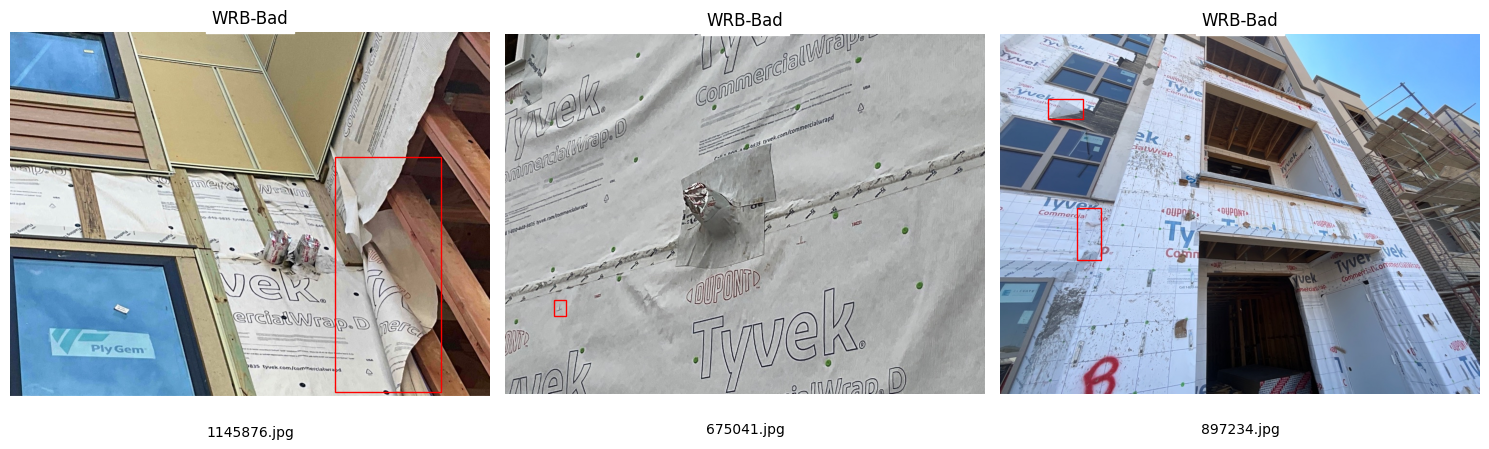

In [13]:
from utils.visualization_functions import visualize_random_images_with_bbox_annotations

# Load the JSON file containing the annotations
with open(json_dataset_path_bbox, 'r') as f:
    combined_annotations = json.load(f)

# Display the images
num_images_to_visualize = 3
visualize_random_images_with_bbox_annotations(combined_annotations, num_images_to_visualize)
